<img src="gcd.png" align="right" style="float" width="100">

<img src="logo_UV.jpg"  align="right" style="float" width="200">

<font color="#CA3532"><h1 align="left">Degree in Data Science.</h1></font>
<font color="#6E6E6E"><h2 align="left">Lab Session 6. Hackathon.</h2></font> 


#### Nombre Apellidos

The grades will not depend only on the obtained results but also on the procedure followed and its proper reasoning. You have to include comments describing what you have done and its motivation. The use of knowledge learned during ALL lab sessions will be positively evaluated.

+ `The use of the SCIKIT-LEARN library is preferred`
+ `Code without any comments will be penalized`
+ `Answer carefully any question suggested`

La nota no va a depender únicamente de los resultados obtenidos sino del procedimiento utilizado y su justificación. Esmérate en incluir comentarios que describan el procedimiento y la motivación de cada paso. Se valorará el uso de todos los conocimientos desarrollados durante las prácticas. 

+ `SE DEBEN UNAR PREFERENTEMENTE FUNCIONES DE LA LIBRERÍA SCIKIT-LEARN`
+ `SE PENALIZARÁ LA INCLUSION DE SEGMENTOS DE CÓDIGO SIN EXPLICACIONES CLARAS DE SU COMETIDO`
+ `NO TE LIMITES A ESCRIBIR CÓDIGO, DEBES RESPONDER CLARAMENTE A LAS PREGUNTAS QUE SE PLANTEAN` 

### How to send the results

At the end of the session, you have to send:

* A compressed folder (ZIP) that has to contain:
  +  a `data` folder with the used data
  +  a `LS6_2023_2024.ipynb` file with your work, including your comments and answers to the proposed questions.
  
**Don't change the names of the files please**

### Entrega 

Al finalizar el examen debéis entregar:  

* Una carpeta con compresión ZIP que contenga:
    + carpeta `data` con los datos del problema.
    + Un fichero `LS6_2023_2024.ipynb` con el código utilizado **debidamente comentado** que incluya las respuesta a las preguntas planteadas.  
    
`UTILIZA SIEMPRE RUTAS LOCALES, REFERIDAS A LA UBICACIÓN DEL JUPITER NOTEBOOK, PARA LA CARGA DE DATOS DE FICHEROS`

**NO CAMBIES EL NOMBRE A ESTOS FICHEROS**  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import pdist
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif,SelectKBest 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

1. Import the data provided in the folder (1 points). Check that there aren't missing data (.info(),.describe()) and that the variables are numeric.

In [2]:
#Solution

X_data = pd.read_csv('data/X_modelo_L1.csv')
y_data = pd.read_csv('data/y_modelo_L1.csv')


print("X_data info:")
print(X_data.info())
print("\nX_data description:")
print(X_data.describe())

print("\ny_data info:")
print(y_data.info())
print("\ny_data description:")
print(y_data.describe())

X_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      1234 non-null   float64
 1   v2      1234 non-null   float64
 2   v3      1234 non-null   float64
 3   v4      1234 non-null   float64
 4   v5      1234 non-null   float64
 5   v6      1234 non-null   float64
dtypes: float64(6)
memory usage: 58.0 KB
None

X_data description:
                v1           v2           v3           v4           v5  \
count  1234.000000  1234.000000  1234.000000  1234.000000  1234.000000   
mean     -0.207488     1.989606     1.339924    -1.189677    -0.237945   
std       1.025655     5.833729     4.254393     2.089994     1.809110   
min      -1.414213   -13.773100    -5.286100    -8.548200    -3.952200   
25%      -1.238838    -1.438150    -1.646875    -2.462275    -1.325275   
50%      -0.419407     2.334150     0.561365    -0.588590    -0.370350   


2. Divide your dataset into training (70%) and test (30%) subsets using the *hold-out* logic. Provide the random state for reproducibility using the seed value of 123. 

In [3]:
#Solution

# Set the seed for reproducibility
random_state = 123

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=random_state)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (863, 6)
X_test shape: (371, 6)
y_train shape: (863, 1)
y_test shape: (371, 1)


3. Scale the inputs (standardize), and consider that you have two subsets (train/test).
+ Why do you do this?
+ Do you need to do this allways for any kind of modelling approach?

Different features in your dataset may have different scales. Standardizing helps in bringing all features to a similar scale.<br>
Standardizing features ensures that no single feature dominates the learning algorithm due to its scale.<br>
The need for standardizing features depends on the specific machine learning algorithm which is used.

In [4]:
#Solution

# Create a StandardScaler
scaler = StandardScaler()
# normalizer = Normalizer()
# X_train_normalized = normalizer.fit_transform(X_train)


# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Check how "independent" are the input variables. Visualize the correlation matrix (`corrcoef()`,`.imshow()`) and discard the highly correlated ones (`> 0.80`), keeping the first among the highly correlated ones. Hint: you can use `numpy.delete()`  to remove the features (columns) you are not interested. Remember to consider the absolute values of the correlation matrix.

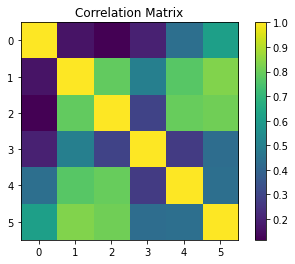

In [5]:
#Solution

# Calculate the correlation matrix
correlation_matrix = np.abs(np.corrcoef(X_train_scaled, rowvar=False))

# Visualize the correlation matrix
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

In [6]:
#Solution

# Find and remove highly correlated features
threshold = 0.8
highly_correlated = np.where(correlation_matrix > threshold)
correlated_features = set()

for i, j in zip(*highly_correlated):
    if i != j and i not in correlated_features and j not in correlated_features:
        correlated_features.add(j)
        
# Remove highly correlated features
X_train_no_corr = np.delete(X_train_scaled, list(correlated_features), axis=1)
X_test_no_corr = np.delete(X_test_scaled, list(correlated_features), axis=1)

# Display the shapes after removing correlated features
print("X_train_no_corr shape:", X_train_no_corr.shape)
print("X_test_no_corr shape:", X_test_no_corr.shape)

X_train_no_corr shape: (863, 5)
X_test_no_corr shape: (371, 5)


5. Reduce the dimensionality of the input data by rotating the data (PCA). Afterward, plot the total variance (x) versus the number of components (y), and take the minimum number of components that capture at least `98%` of the cumulative variance. **Important! Use the scaled data, not the data with the highly correlated variables removed from the previous exercise**.
+ What is the optimal number of components?
+ Explain what the curve represents
+ Apply the PCA to the input data accordingly using the optimal number of components

The optimal number of components is 4. The chart shows that the first component describes approximately 85% of the inputs. From 4, each subsequent element describes a small number of inputs.

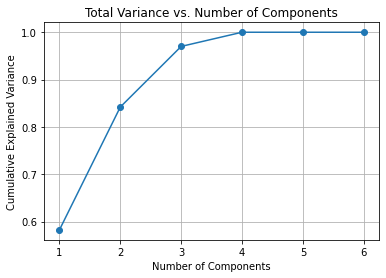

Minimum number of components for 98% cumulative variance: 4
Minimum Number of Components: 4
Shape of X_train: (863, 4)
Shape of X_test: (371, 4)


In [7]:
#Solution

# Create a PCA instance
pca = PCA()

# Fit PCA on the scaled data
pca.fit(X_train_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot total variance versus number of components
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Total Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Find the minimum number of components for at least 98% cumulative variance
min_components = np.argmax(cumulative_variance >= 0.98) + 1
print("Minimum number of components for 98% cumulative variance:", min_components)

# Apply PCA with the determined number of components
pca = PCA(n_components=min_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the minimum number of components
print("Minimum Number of Components:", min_components)

# Print courent shape of data
print("Shape of X_train:", X_train_pca.shape)
print("Shape of X_test:", X_test_pca.shape)

6. Now, we are going to train and optimize (gridsearchCV) the parameters of two random forest models:
+ a) with the reduced input features according to the correlation criteria
+ b) with the optimized PCA transformation of the inputs

Which one has ended up being the best approach? Why?

To find the best possible model, please constrain the search to a number of estimators between `[1,150]` in steps of `20`, minimum samples per leaf ranging between `[1,20]`, and three strategies to select the maximum number of features when looking for the best split of `('auto','log2','sqrt') `


Accurycy score with PCA should not to be much worse, it may be due to the fact that PCA uses 4 out of 6 features, which has a minimal impact on the deterioration of the result but significantly speeds up the operation of the program. In my program I have the same accuricy score even though gridsearch uses different parameters. This may be due to the random selection of featchers.

In [8]:
#Solution

# Reshape the target variable using ravel()
y_train_flat = y_train.values.ravel()

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': np.arange(1, 151, 20),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': ['auto', 'log2', 'sqrt']
}

# Model with reduced input features
rf_model_reduced = RandomForestClassifier(random_state=123)

# GridSearchCV for the model with reduced input features
grid_search_reduced = GridSearchCV(rf_model_reduced, param_grid, cv=5, n_jobs=-1)
grid_search_reduced.fit(X_train_no_corr, y_train_flat)

# Model with PCA transformation of inputs
rf_model_pca = RandomForestClassifier(random_state=123)

# GridSearchCV for the model with PCA transformation of inputs
grid_search_pca = GridSearchCV(rf_model_pca, param_grid, cv=5, n_jobs=-1)
grid_search_pca.fit(X_train_pca, y_train_flat)

# Display the best parameters for each model
print("Best parameters for model with reduced input features:", grid_search_reduced.best_params_)
print("Best parameters for model with PCA transformation of inputs:", grid_search_pca.best_params_)


Best parameters for model with reduced input features: {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 41}
Best parameters for model with PCA transformation of inputs: {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 61}


In [9]:
# Make predictions on the test set
y_pred_reduced = grid_search_reduced.predict(X_test_no_corr)
y_pred_pca = grid_search_pca.predict(X_test_pca)

# Evaluate performance on the test set
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# mean_squared_error(y_test, y_pred_pca)

print("Accuracy score on Reduced Features:", accuracy_reduced)
print("Accuracy score on PCA Transformation:", accuracy_pca)

Accuracy score on Reduced Features: 0.9460916442048517
Accuracy score on PCA Transformation: 0.9460916442048517


7. Finally, plot the feature importances of the best-followed modeling approach according to your results. Use the Mean Decrease in Impurity (MDI) as a metric.
Use a bar plot (pd.Series) and show the std over the trees composing Rf of the `best_estimator`.   
+ Which are the most relevant input features for the classifier?

The most important for the classifier are feature4 and feature1. The rest is also important, but there is a significant difference between this pair and the rest

RandomForestClassifier(n_estimators=61, random_state=123)


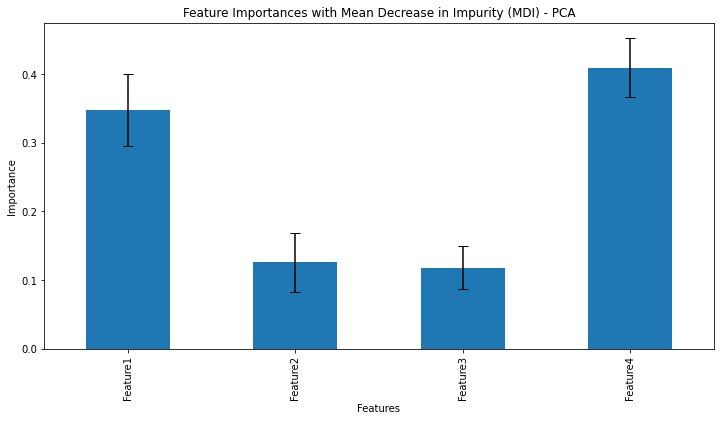

In [12]:
bestEstimators = grid_search_pca.best_estimator_.estimators_

# Create generic feature names for plotting
feature_names_generic = [f"Feature{i+1}" for i in range(X_train_pca.shape[1])]

# Extract feature importances and std from the best model with PCA transformation
feature_importances_pca = grid_search_pca.best_estimator_.feature_importances_
std_importances_pca = np.std([tree.feature_importances_ for tree in bestEstimators], axis=0)

# Create a pandas Series for easier plotting
importance_series_pca = pd.Series(feature_importances_pca, index=feature_names_generic)

# Plot feature importances with std
plt.figure(figsize=(12, 6))
importance_series_pca.plot(kind='bar', yerr=std_importances_pca, capsize=5)
plt.title('Feature Importances with Mean Decrease in Impurity (MDI) - PCA')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

8. Predict on the evaluation dataset and save the data as a CSV file with a (`,`) delimiter and add a header to the file named `Yhat_Eva`   

In [13]:
X_evalua = pd.read_csv('data/X_evalua_L1.csv')

# Create a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_scaled = scaler.fit_transform(X_data)
X_evalua_scaled = scaler.transform(X_evalua)

# Calculate the correlation matrix
correlation_matrix = np.abs(np.corrcoef(X_scaled, rowvar=False))

# Find and remove highly correlated features
threshold = 0.8
highly_correlated = np.where(correlation_matrix > threshold)
correlated_features = set()

for i, j in zip(*highly_correlated):
    if i != j and i not in correlated_features and j not in correlated_features:
        correlated_features.add(j)

# Remove highly correlated features
X_no_corr = np.delete(X_scaled, list(correlated_features), axis=1)
X_evalua_no_corr = np.delete(X_evalua_scaled, list(correlated_features), axis=1)
print("Shape of X_train:", X_no_corr.shape)

# Model with reduced input features
rf_classifier = RandomForestClassifier(n_estimators=41, min_samples_leaf=2, max_features='auto', random_state=123)

# Fit the scaler on the training data
rf_classifier.fit(X_no_corr, np.ravel(y_data))

# Make predictions
y_pred = rf_classifier.predict(X_evalua_no_corr)
print(y_pred)
predictions = pd.DataFrame(y_pred)

# Save the DataFrame to a CSV file with a (,) delimiter and include a header
predictions.to_csv('data_predictions.csv', index=False)

Shape of X_train: (1234, 5)
[1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0]
